In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

air_df = pd.read_csv('Airdata.csv')

print('Number of missing values:')
for col in air_df.columns:
    n_MV = sum(air_df[col].isna())
    print('{}:{}'.format(col,n_MV))


Number of missing values:
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


# Diagnóstico de los valores nulos de NO2_Location_A
## Comprobamos con la temperatura
Habría que repetirlo con el resto de características

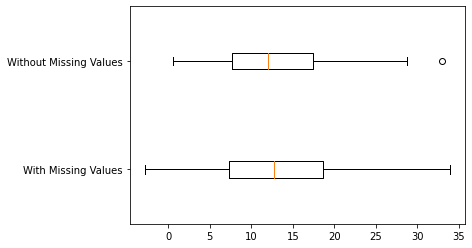

In [2]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['With Missing Values','Without Missing Values']

box_sr = pd.Series('',index = BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature

plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)
plt.show()

El gráfico está centrado, no parece que haya dependencia.

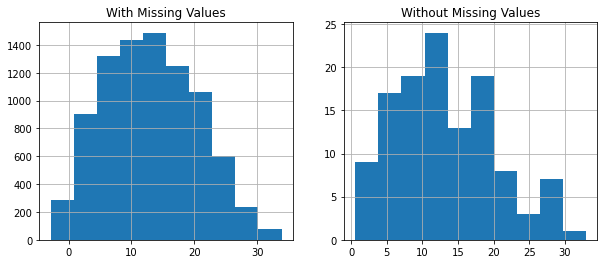

In [3]:
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(),air_df.Temperature.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

Distribución muy similar a la normal, no parece que haya dependencia

In [4]:
from scipy.stats import ttest_ind
BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature).pvalue

0.9549726689684548

El p-value es .95 sobre 1, con lo que no hay razón alguna para ver dependencia entre los valores
nulos y la característica temperatura (el p-value es significante con valores cercanso a 0.05).

# Diagnóstico de los valores nulos de NO2_Location_A
## Repetimos con todas las características

Diagnosis Analysis of Missing Values for Temperature:


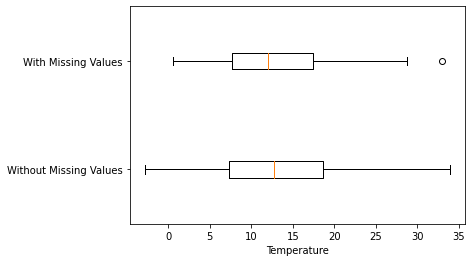

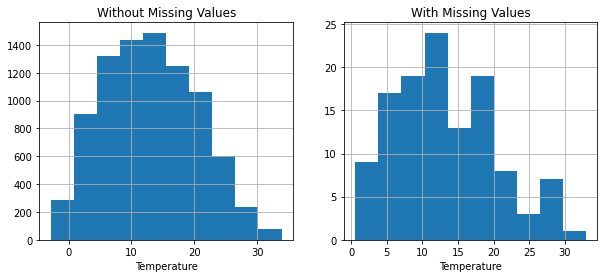

p-value of t-test: 0.9549726689684548
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


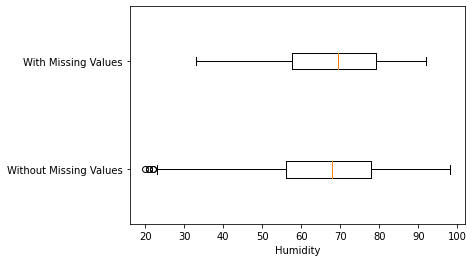

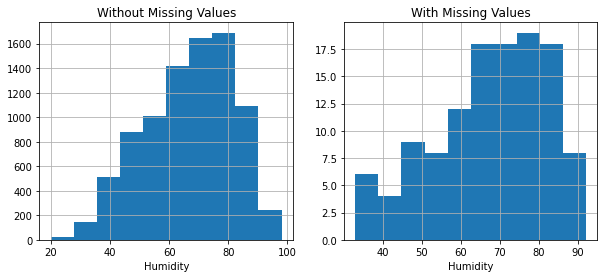

p-value of t-test: 0.5593319830352679
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


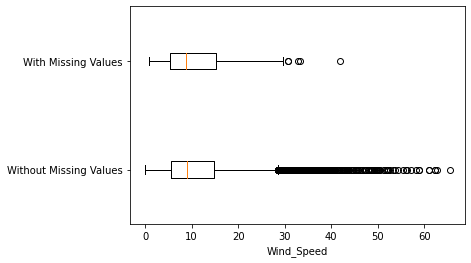

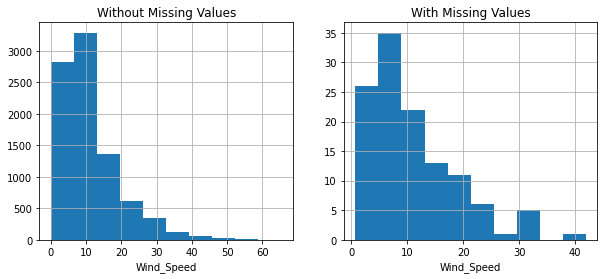

p-value of t-test: 0.8172472856083665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


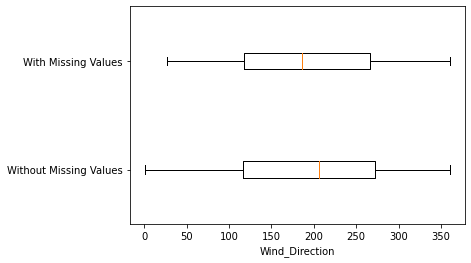

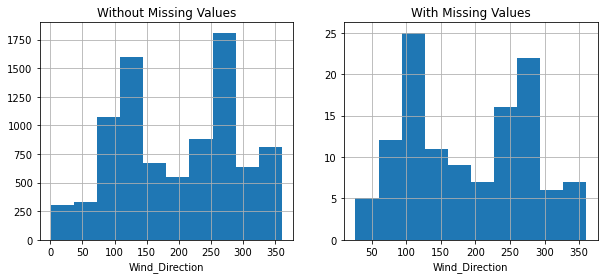

p-value of t-test: 0.39869195396670654
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [5]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

# Diagnóstico de los valores nulos de NO2_Location_B
## Comprobamos con la temperatura

Diagnosis Analysis of Missing Values for Temperature:


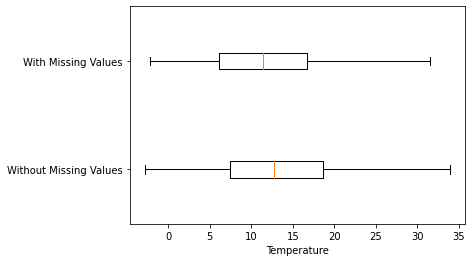

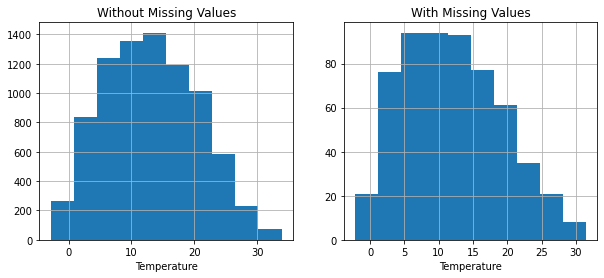

p-value of t-test: 0.00018958810621204928
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


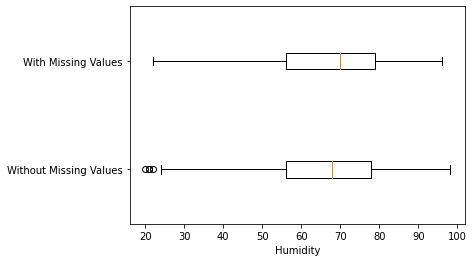

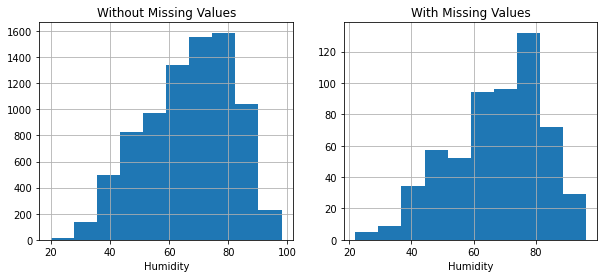

p-value of t-test: 0.43891454332709956
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


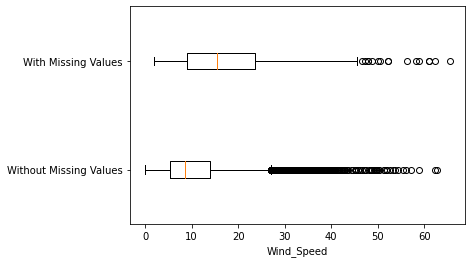

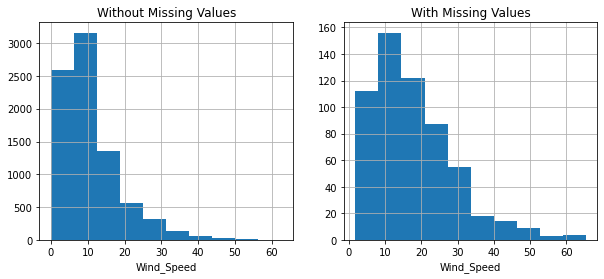

p-value of t-test: 1.3126894108159327e-85
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


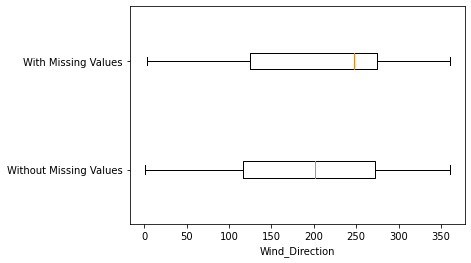

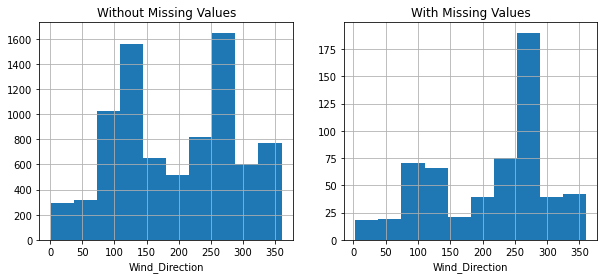

p-value of t-test: 5.8398056632254833e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


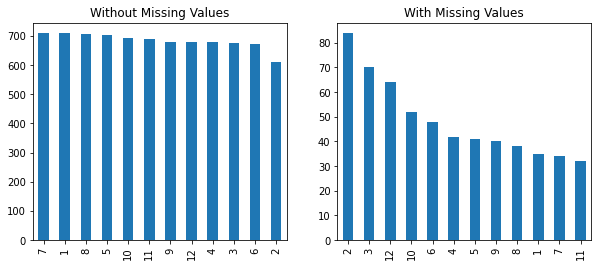

p-value of Chi_squared test: 1.8048364819875927e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


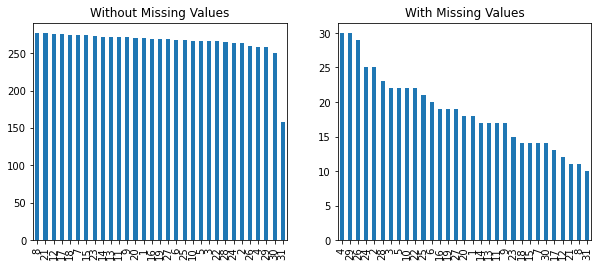

p-value of Chi_squared test: 0.034816691411564224
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


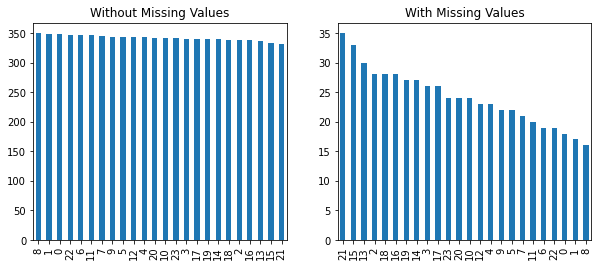

p-value of Chi_squared test: 0.3949474320151337
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


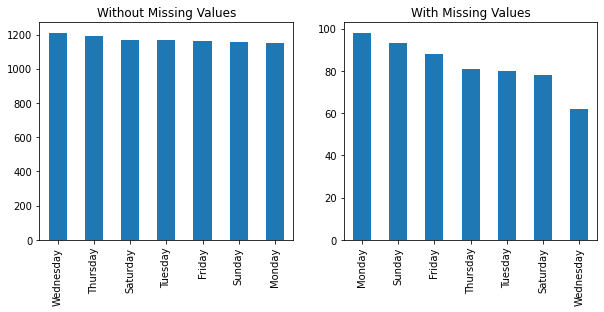

p-value of Chi_squared test: 0.07073083108612685
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [7]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

air_df.DateTime = pd.to_datetime(air_df.DateTime)
air_df['month'] = air_df.DateTime.dt.month
air_df['day'] = air_df.DateTime.dt.day
air_df['hour'] = air_df.DateTime.dt.hour
air_df['weekday'] = air_df.DateTime.dt.day_name()

categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_B.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Se puede ver como Wind_Speed tiene relación co nlos valores faltantes

# Diagnóstico de los valores nulos de NO2_Location_C
## Comprobamos con la temperatura

In [ ]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity',
                        'Wind_Speed', 'Wind_Direction']
BM_MV = air_df.NO2_Location_C.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')